# Fraud Detection in Python (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Fraud Detection in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Introduction and preparing your data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline 

# CHAPTER 2 - Fraud detection using labelled data
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# CHAPTER 3 - Fraud detection using unlabelled data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

# CHAPTER 4 - Fraud detection using text
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora
import pyLDAvis.gensim

Using TensorFlow backend.


In [4]:
%%time
from pdf2image import convert_from_path

poppler_path = 'C:/Users/Admin/poppler-0.68.0/bin'

# pdf with the course material
pdf_1 = convert_from_path(data_folder +"chapter1.pdf", 50, poppler_path=poppler_path)
pdf_2 = convert_from_path(data_folder +"chapter2.pdf", 50, poppler_path=poppler_path)
pdf_3 = convert_from_path(data_folder +"chapter3.pdf", 50, poppler_path=poppler_path)
pdf_4 = convert_from_path(data_folder +"chapter4.pdf", 50, poppler_path=poppler_path)

Wall time: 5.36 s


In [5]:
# plot 1 image
def plot_pdf_1(pdf, page, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0):
    plt.axis('off'); plt.imshow(pdf[page])
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_pdf_2(pdf, page1, page2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1); plt.axis('off'); plt.imshow(pdf[page1])
    plt.subplot(1, 2, 2); plt.axis('off'); plt.imshow(pdf[page2])
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_pdf_3(pdf, page1, page2, page3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1); plt.axis('off'); plt.imshow(pdf[page1]); 
    plt.subplot(1, 3, 2); plt.axis('off'); plt.imshow(pdf[page2])
    plt.subplot(1, 3, 3); plt.axis('off'); plt.imshow(pdf[page3])
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_pdf_4(pdf, page1,page2,page3,page4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1); plt.axis('off'); plt.imshow(pdf[page1])
    plt.subplot(1, 4, 2); plt.axis('off'); plt.imshow(pdf[page2])
    plt.subplot(1, 4, 3); plt.axis('off'); plt.imshow(pdf[page3])
    plt.subplot(1, 4, 4); plt.axis('off'); plt.imshow(pdf[page4])    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

In [6]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1); image = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(image)
    plt.subplot(1, 2, 2); image = plt.imread(data_folder + (image2+format_img)); plt.axis('off'); plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1); imagem = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(imagem); 
    plt.subplot(1, 3, 2); imagem = plt.imread(data_folder + (image2+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 3, 3); imagem = plt.imread(data_folder + (image3+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1); imagem = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 4, 2); imagem = plt.imread(data_folder + (image2+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 4, 3); imagem = plt.imread(data_folder + (image3+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 4, 4); imagem = plt.imread(data_folder + (image4+format_img)); plt.axis('off'); plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Introduction and preparing your data


In this chapter, you'll learn about the typical challenges associated with fraud detection, and will learn how to resample your data in a smart way, to tackle problems with imbalanced data.

#### Exercício 1 - Introduction to fraud detection

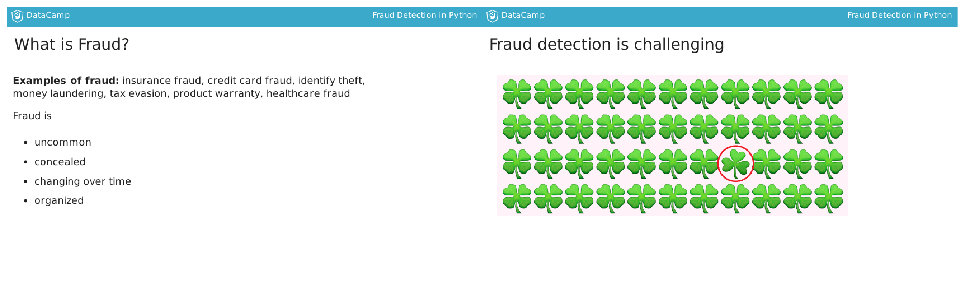

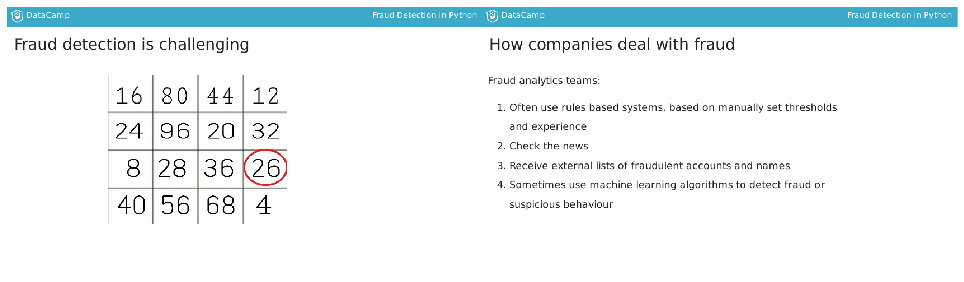

In [7]:
#vídeo
plot_pdf_2(pdf_1, 2, 4); plot_pdf_2(pdf_1, 6, 7)

Exercício 2

In [8]:
# Checking the fraud to non-fraud ratio

# Import pandas and read csv
df = pd.read_csv(data_folder + "creditcard_sampledata.csv").drop('Unnamed: 0', axis=1)

# Explore the features available in your dataframe
display(df.head())
display(df.info())

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
display(occ)

# Print the ratio of fraud cases
display(occ / occ.sum())


Time        V1        V2        V3        V4        V5        V6        V7  \
0    64  1.212511 -0.099054 -1.192094  0.286324  2.160516  3.616314 -0.404207   
1    64 -0.658305  0.406791  2.037461 -0.291298  0.147910 -0.350857  0.945373   
2   124  1.105253  0.541842  0.839421  2.570933 -0.279517 -0.423062  0.088019   
3   128  1.239495 -0.182609  0.155058 -0.928892 -0.746227 -1.235608 -0.061695   
4   132 -1.571359  1.687508  0.734670  1.293350 -0.217532 -0.002677  0.147364   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.842331  0.169360  ... -0.167496 -0.494695 -0.149785  1.011227  0.883548   
1 -0.172560  0.025133  ... -0.156096 -0.238805  0.089877  0.421195 -0.352487   
2  0.011622 -0.715756  ... -0.137434 -0.460991  0.189397  0.556329  0.185786   
3 -0.125223  0.984938  ...  0.146077  0.481119 -0.140019  0.538261  0.710720   
4  0.515362 -0.372442  ...  0.048549  0.377256 -0.030436  0.117608 -0.060520   

        V26       V27       V28  Amount  Class  
0 -0.329434  0.020370  0.017037   34.70      0  
1  0.074783 -0.094192 -0.092493   54.99      0  
2 -0.189030  0.000208  0.026167    6.24      0  
3 -0.621382  0.036867  0.010963    8.80      0  
4 -0.296550 -0.481570 -0.167897   10.00      0  

[5 rows x 31 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8000 non-null   int64  
 1   V1      8000 non-null   float64
 2   V2      8000 non-null   float64
 3   V3      8000 non-null   float64
 4   V4      8000 non-null   float64
 5   V5      8000 non-null   float64
 6   V6      8000 non-null   float64
 7   V7      8000 non-null   float64
 8   V8      8000 non-null   float64
 9   V9      8000 non-null   float64
 10  V10     8000 non-null   float64
 11  V11     8000 non-null   float64
 12  V12     8000 non-null   float64
 13  V13     8000 non-null   float64
 14  V14     8000 non-null   float64
 15  V15     8000 non-null   float64
 16  V16     8000 non-null   float64
 17  V17     8000 non-null   float64
 18  V18     8000 non-null   float64
 19  V19     8000 non-null   float64
 20  V20     8000 non-null   float64
 21  V21     8000 non-null   float64
 22  

None

0    7983
1      17
Name: Class, dtype: int64

0    0.997875
1    0.002125
Name: Class, dtype: float64

Exercício 3

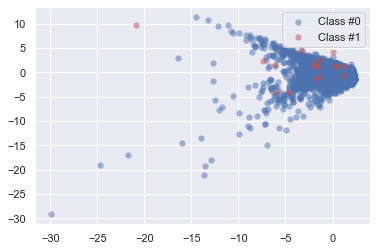

In [9]:
# Plotting your data

def prep_data(df):
    X = df.iloc[:, 1:30] # 'V1' till 'V28'
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30] # 'Class'
    y=np.array(y).astype(np.float)
    return X, y

# Define a function to create a scatter plot of our data and labels  ---> isto mostra apenas as 1ª e 2ª observações
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15) # 7983 pontos (1ª e 2ª observações)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')  # 17 pontos ("" "")
    plt.legend()
    return plt.show()

# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

# By visualizing your data you can immediately see how our fraud cases are scattered over our data, and how few are cases
# we have. A picture often makes the imbalance problem often very clear. In the next exercises we'll visually explore how
# to improve our fraud to non-fraud balance.

354.33

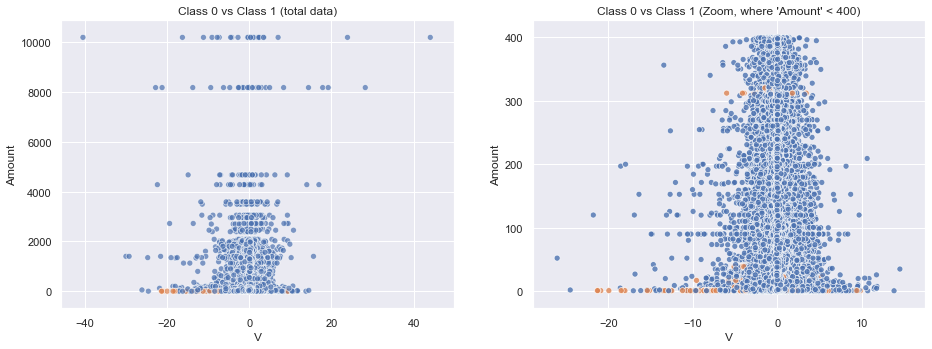

In [10]:
# meu (sobrepôr)

# maximum fraudulent Amount 
display(df[df['Class'] == 1]['Amount'].value_counts().index.max())

# plot using seaborn
plt.subplot(1, 2, 1)
for i in range(1, 29):
    sns.scatterplot('V{}'.format(i), 'Amount', data=df, hue='Class', legend=False, alpha=0.7)
    plt.xlabel('V')
    plt.title('Class 0 vs Class 1 (total data)')
    
plt.subplot(1, 2, 2)
for i in range(1, 29):
    sns.scatterplot('V{}'.format(i), 'Amount', data=df[df['Amount'] < 400], hue='Class', legend=False, alpha=0.8)
    plt.xlabel('V')
    plt.title("Class 0 vs Class 1 (Zoom, where 'Amount' < 400)")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

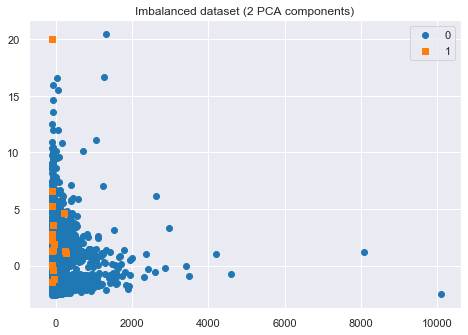

In [11]:
# outra forma é representar assim, com PCA

# 2-dimensional plot function
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0)
    plt.show()
    
# PCA
from sklearn.decomposition import PCA

X = df.iloc[:, 1:30] # 'V1' till 'V28'
y = df.iloc[:, 30] # 'Class'

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

#### Exercício 4 - Increasing successful detections using data resampling

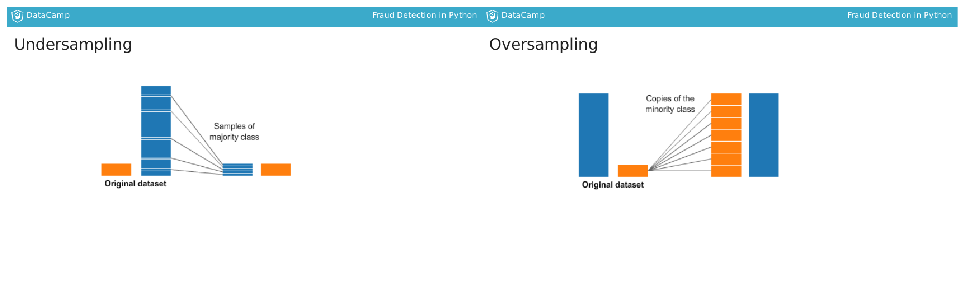

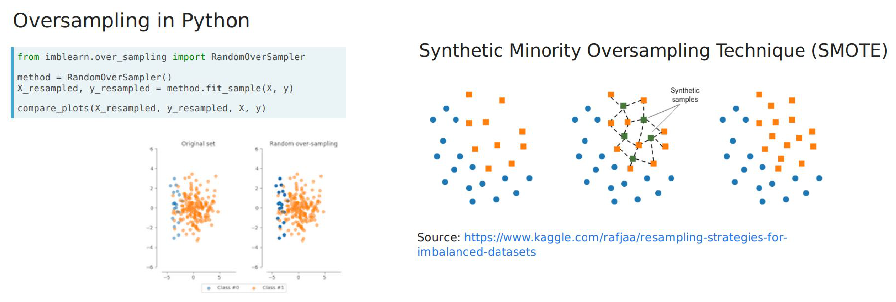

In [12]:
#vídeo

plot_pdf_2(pdf_1, 11, 12)

# Oversampling in Python
from imblearn.over_sampling import RandomOverSampler, SMOTE

plot_2('oversampling', 'SMOTE')

- **Resampling strategies for imbalanced datasets**

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

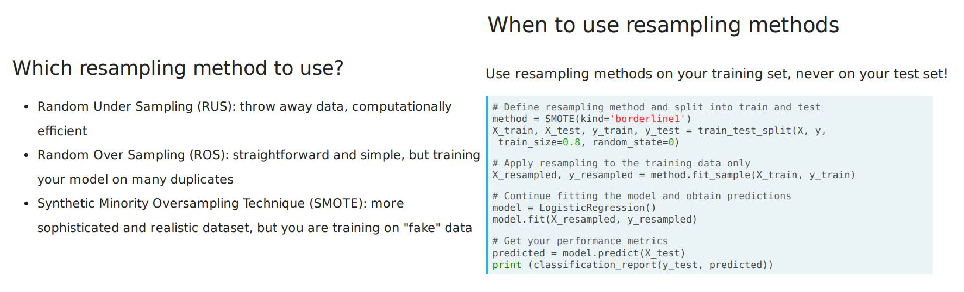

In [13]:
plot_2('which_resampling', 'when_resampling')

Exercício 5

In [14]:
# Resampling methods for imbalanced data

# Which of these methods takes a random subsample of your majority class to account for class "imbalancedness"?
print("Random Under Sampling (RUS)")

Random Under Sampling (RUS)


Exercício 6

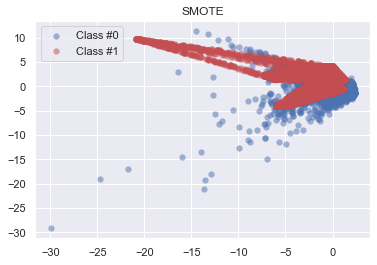

In [15]:
# Applying SMOTE

from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE()   # default 'auto': equivalent to 'not majority'. | 'minority'

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plt.title('SMOTE')
plot_data(X_resampled, y_resampled)

Exercício 7

0.0    7983
1.0      17
dtype: int64
1.0    7983
0.0    7983
dtype: int64


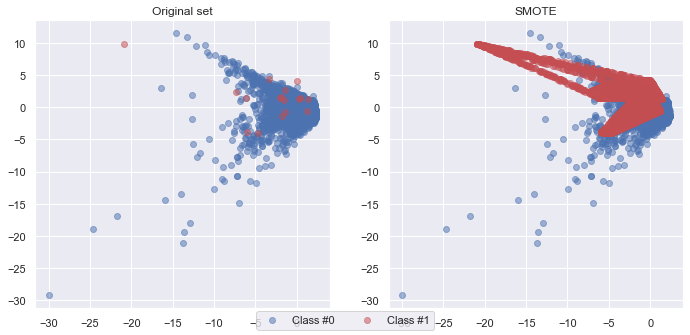

In [16]:
# Compare SMOTE to original data

def compare_plot(X, y, X_resampled, y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
#     plt.tight_layout(pad=3)
    plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0.2, hspace=0)
    return plt.show()

#######################################

# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')


#### Exercício 8 - Fraud detection algorithms in action

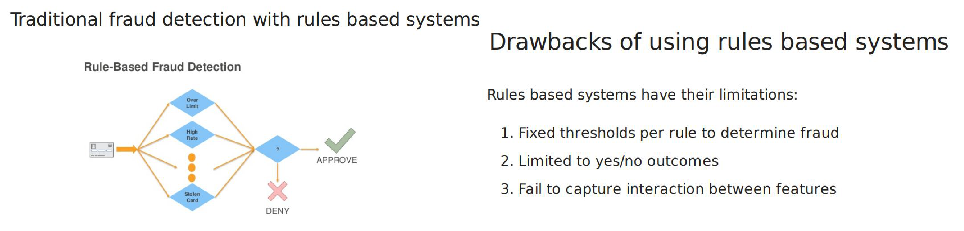

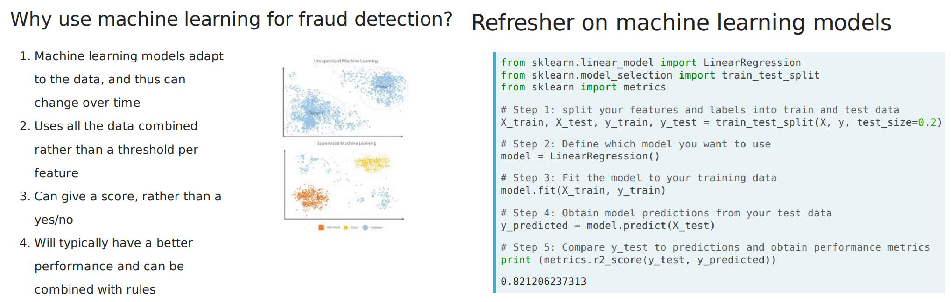

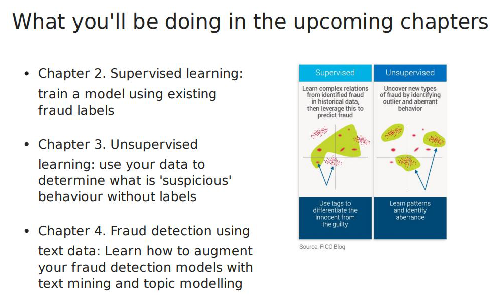

In [17]:
#vídeo

plot_2('traditional', 'drawbacks'); print("="*120); plot_2('why_ml', 'refresher'); print("="*120)
plot_1('next_chapters', right=1.5)

Exercício 9

In [18]:
# Exploring the traditional way to catch fraud

# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
display(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

print("""With this rule, we detect 4 out of 17 fraud cases, but can't detect the other 13, and get 34 false positives.""")
display(round(4/(4+13), 2))

Flagged Fraud     0   1
Actual Fraud           
0              7949  34
1                13   4

With this rule, we detect 4 out of 17 fraud cases, but can't detect the other 13, and get 34 false positives.


0.24

Exercício 10

In [19]:
# Using ML classification to catch fraud

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)

print('Confusion matrix:\n', conf_mat)

print("\nWe're only using the test data: {}".format(0.3*len(X)))
print("The results of this ML model are better: {}% (3 ou of 10) are catched and {} FP".format(3/(3+7)*100, 0))

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   7    3]]

We're only using the test data: 2400.0
The results of this ML model are better: 30.0% (3 ou of 10) are catched and 0 FP


Exercício 11

In [20]:
# Logistic regression combined with SMOTE

from imblearn.over_sampling import BorderlineSMOTE

# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE()
model = LogisticRegression(max_iter=1000)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])


*Over-sampling using Borderline SMOTE.*

This algorithm is a variant of the original SMOTE algorithm proposed in https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.BorderlineSMOTE.html#imblearn.over_sampling.BorderlineSMOTE. Borderline samples will be detected and used to generate new synthetic samples.

Exercício 12

In [21]:
# Using a pipeline

# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)

print('Confusion matrix:\n', conf_mat)

print("""Now it catches 4 out of 10 ({}%), but has 7 FP.""".format(round(4/10*100, 2)))
print("""\nRemember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very
spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also
fraud cases, so the synthetic samples might 'confuse' the model slightly. In the next chapters, we'll learn how to also
adjust our machine learning models to better detect the minority fraud cases.""")

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.36      0.40      0.38        10

    accuracy                           0.99      2400
   macro avg       0.68      0.70      0.69      2400
weighted avg       0.99      0.99      0.99      2400

Confusion matrix:
 [[2383    7]
 [   6    4]]
Now it catches 4 out of 10 (40.0%), but has 7 FP.

Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very
spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also
fraud cases, so the synthetic samples might 'confuse' the model slightly. In the next chapters, we'll learn how to also
adjust our machine learning models to better detect the minority fraud cases.


In [22]:
# Now with SMOTE
pipeline_2 = Pipeline([('SMOTE', SMOTE('minority')), ('Logistic Regression', LogisticRegression(max_iter=1000))])

pipeline_2.fit(X_train, y_train) 
predicted_2 = pipeline_2.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted_2))
conf_mat_2 = confusion_matrix(y_true=y_test, y_pred=predicted_2)

print('Confusion matrix:\n', conf_mat_2)
print("""With normal SMOTE now it catches more, 5 out of 10 (50%), but has more FP, 16.""")

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2390
         1.0       0.23      0.50      0.31        10

    accuracy                           0.99      2400
   macro avg       0.61      0.75      0.65      2400
weighted avg       0.99      0.99      0.99      2400

Confusion matrix:
 [[2373   17]
 [   5    5]]
With normal SMOTE now it catches more, 5 out of 10 (50%), but has more FP, 16.


# CHAPTER 2 - Fraud detection using labelled data

How to flag fraudulent transactions with supervised learning. You will use classifiers, adjust them and compare them to find the most efficient fraud detection model.

#### Exercício 1 - Review of classification methods

Classification methods commonly used for fraud detection:


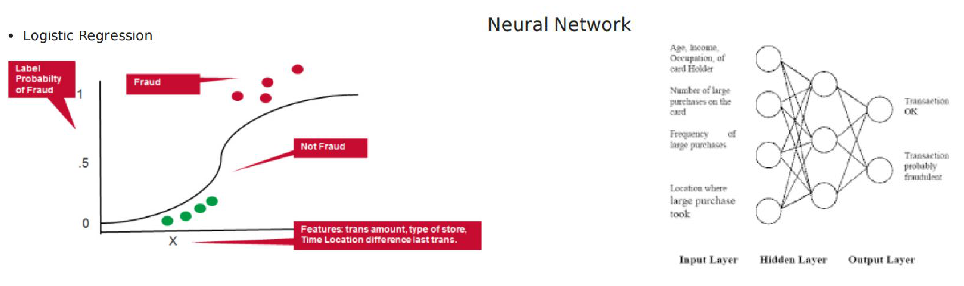

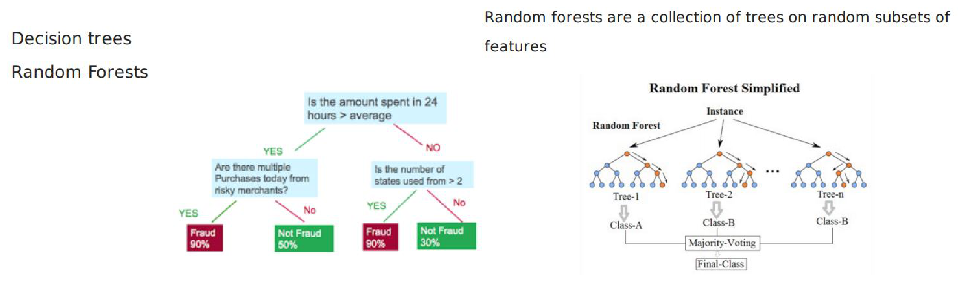

In [23]:
#vídeo
print("Classification methods commonly used for fraud detection:"); plot_2('logreg', 'nn'); plot_2('dt', 'rf')

Exercício 2

In [24]:
# Natural hit rate

# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage, """: this is our "natural accuracy" by doing nothing""")

99.7875 : this is our "natural accuracy" by doing nothing


In [25]:
display(df.Class.value_counts())
display(round(17/8000*100, 2))

0    7983
1      17
Name: Class, dtype: int64

0.21

Exercício 3

In [26]:
# Random Forest Classifier - part 1

# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)


Exercício 4

In [27]:
# Random Forest Classifier - part 2

from sklearn.metrics import accuracy_score

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

# What is a benefit of using Random Forests versus Decision Trees?
print("""Random Forests do not tend to overfit, whereas Decision Trees do.""")

0.9970833333333333
Random Forests do not tend to overfit, whereas Decision Trees do.


#### Exercício 5 - Performance evaluation

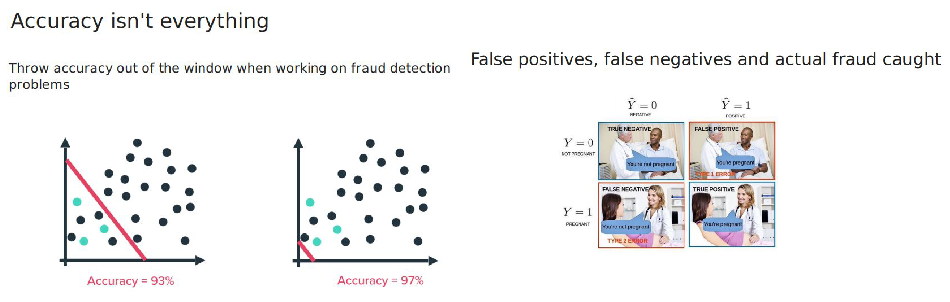

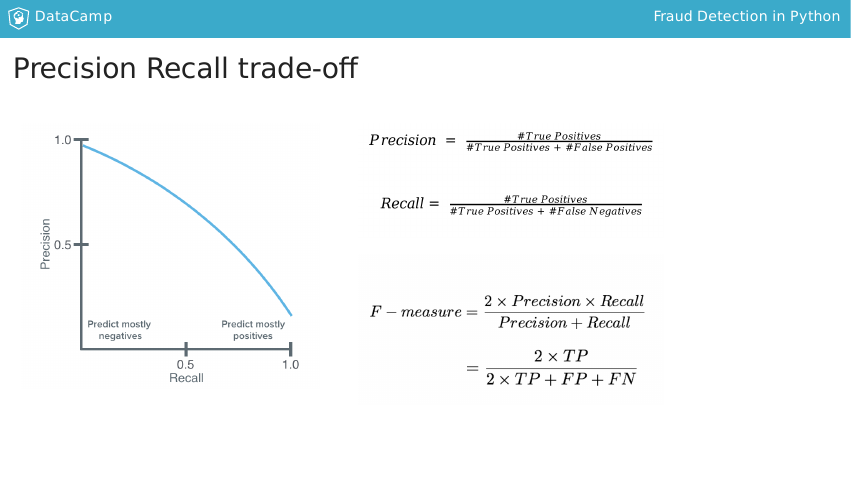

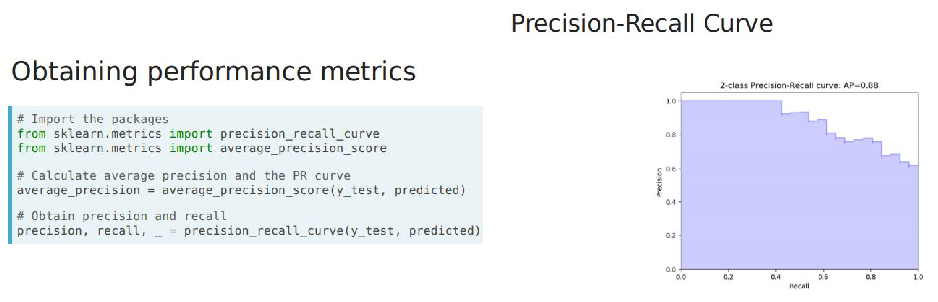

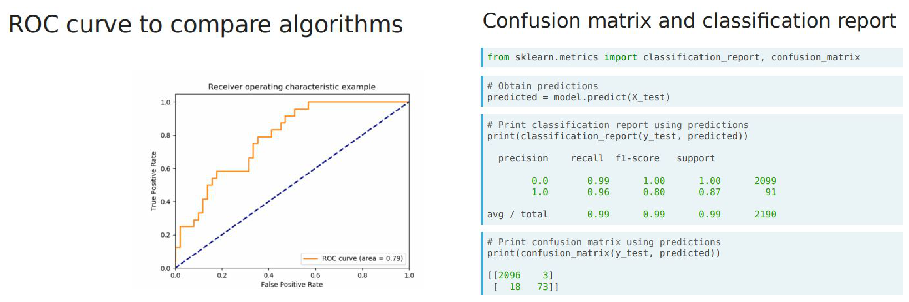

In [28]:
#vídeo
plot_2('accuracy', 'confusion_matrix'); print("="*120)
display(pdf_2[11]); plot_2('obtaining_metrics', 'precision_recall_curve')
print("="*120); plot_2('roc', 'cm_cr')

Exercício 6

In [29]:
# Performance metrics for the RF model

# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print("ROC AUC score:", roc_auc_score(y_test, probs[:,1]))
print("\nClassification report:\n", classification_report(y_test, predicted))
print("\nConfusion matrix:\n", confusion_matrix(y_test, predicted))

ROC AUC score: 0.8934937238493724

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400


Confusion matrix:
 [[2390    0]
 [   7    3]]


Exercício 7

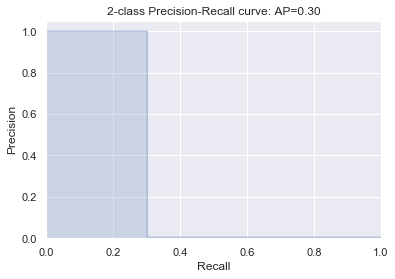

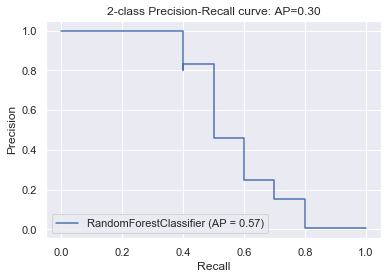

What's the benefit of the performance metric ROC curve (AUROC) versus Precision and Recall?

The AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of
different baseline probabilities?" but precision and recall don't.

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold 
is varied. Since a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, 
classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area
under the ROC curve is larger), they have better expected performance.


In [30]:
# Plotting the Precision Recall Curve

from sklearn.metrics import average_precision_score, precision_recall_curve

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

##################

# automatically - me
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, X_test, y_test)
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

####################

print("What's the benefit of the performance metric ROC curve (AUROC) versus Precision and Recall?")
print("""\nThe AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of
different baseline probabilities?" but precision and recall don't.""")
print("""\nThe ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold 
is varied. Since a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, 
classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area
under the ROC curve is larger), they have better expected performance.""")

#### Exercício 8 - Adjusting your algorithm weights

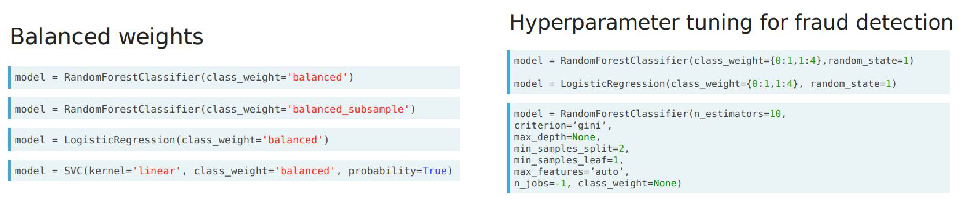

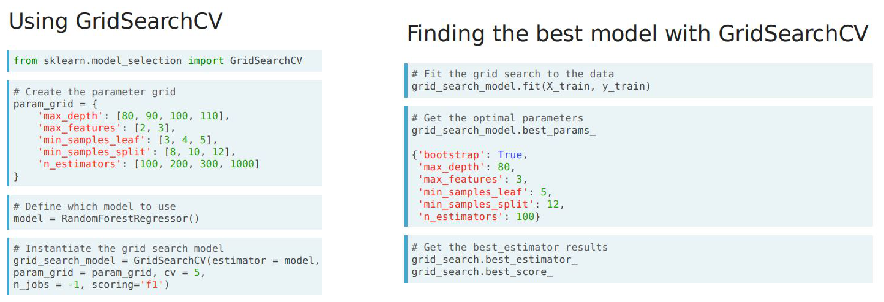

In [31]:
#vídeo
plot_2('balanced_weights', 'hyp_tuning', wspace=0.1); print("="*120); plot_2('gridsearchcv', 'best_grid')

Exercício 9

In [32]:
# Model adjustments

# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:, 1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.8904602510460251
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.10      0.18        10

    accuracy                           1.00      2400
   macro avg       1.00      0.55      0.59      2400
weighted avg       1.00      1.00      0.99      2400

[[2390    0]
 [   9    1]]


Exercício 10

In [33]:
# Adjusting your Random Forest to fraud detection

# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
                               max_depth=10, min_samples_leaf=10, n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print(roc_auc_score(y_test, probs[:, 1]))
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))

get_model_results(X_train, y_train, X_test, y_test, model) #supostamente dava melhores resultados com os outros dados


0.82581589958159
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.80      0.40      0.53        10

    accuracy                           1.00      2400
   macro avg       0.90      0.70      0.77      2400
weighted avg       1.00      1.00      1.00      2400

[[2389    1]
 [   6    4]]


Exercício 11

In [34]:
# GridSearchCV to find optimal parameters

from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5, class_weight={0:1, 1:12})

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)

print(CV_model.best_params_)


{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1}


In [35]:
get_model_results(X_train, y_train, X_test, y_test, CV_model.best_estimator_)

0.6996652719665272
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.67      0.40      0.50        10

    accuracy                           1.00      2400
   macro avg       0.83      0.70      0.75      2400
weighted avg       1.00      1.00      1.00      2400

[[2388    2]
 [   6    4]]


Exercício 12

In [36]:
# Model results using GridSearchCV

# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=4, max_features='auto', n_estimators=1, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

print("""\nTo decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus
how many false positives the fraud analytics team can deal with. Ultimately, this final decision should be made by you and 
the fraud team together.""")

0.6996652719665272
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.67      0.40      0.50        10

    accuracy                           1.00      2400
   macro avg       0.83      0.70      0.75      2400
weighted avg       1.00      1.00      1.00      2400

[[2388    2]
 [   6    4]]

To decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus
how many false positives the fraud analytics team can deal with. Ultimately, this final decision should be made by you and 
the fraud team together.


#### Exercício 13 - Ensemble methods

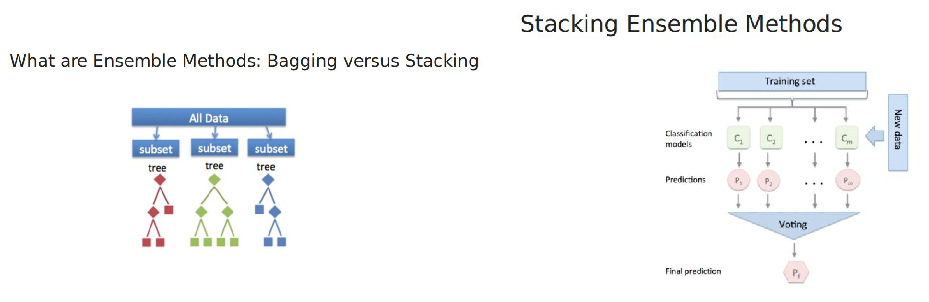

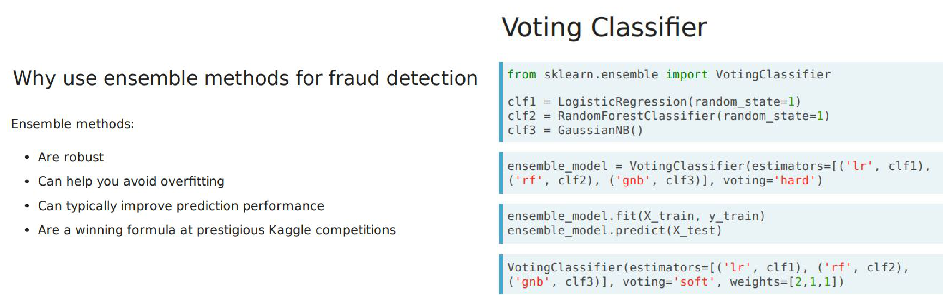

In [37]:
#vídeo
plot_2('bagging_stacking', 'stacking'); plot_2('why_ensemble', 'voting_clf')

from sklearn.ensemble import VotingClassifier

Exercício 14

In [38]:
# Logistic Regression

# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, max_iter=1000)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

0.6871548117154811
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.44      0.40      0.42        10

    accuracy                           1.00      2400
   macro avg       0.72      0.70      0.71      2400
weighted avg       1.00      1.00      1.00      2400

[[2385    5]
 [   6    4]]


Exercício 15

In [39]:
# Voting Classifier

# Import the package
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Run the function get_model_results
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
#     probs = model.predict_proba(X_test)
#     print(roc_auc_score(y_test, probs[:, 1]))
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))
    
########################################################################################################



# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, max_iter=1000)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

print("""\nYou see that by combining the classifiers, you can take the best of multiple models.""")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.40      0.57        10

    accuracy                           1.00      2400
   macro avg       1.00      0.70      0.79      2400
weighted avg       1.00      1.00      1.00      2400

[[2390    0]
 [   6    4]]

You see that by combining the classifiers, you can take the best of multiple models.


Exercício 16

In [40]:
# Adjust weights within the Voting Classifier

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', 
                                  weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

# era suposto ficar melhor

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

[[2390    0]
 [   7    3]]


# CHAPTER 3 - Fraud detection using unlabelled data


This chapter focuses on using unsupervised learning techniques to detect fraud. You will segment customers, use K-means clustering and other clustering algorithms to find suspicious occurrences in your data.

#### Exercício 1 - Normal vs Abnormal behavior

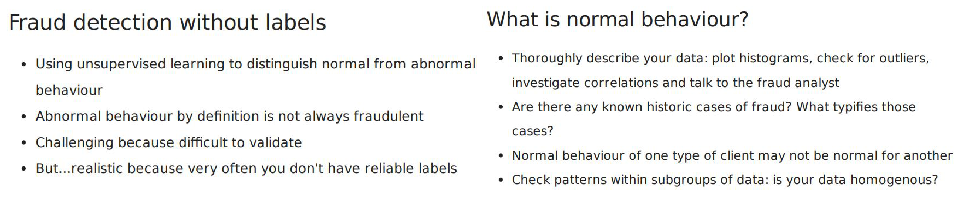

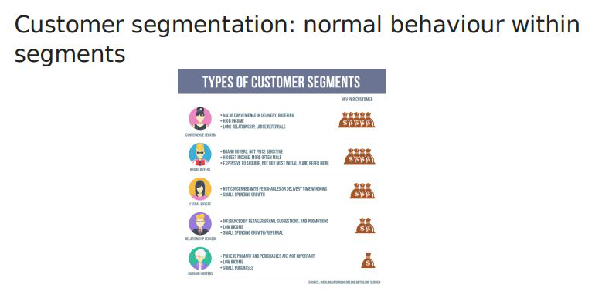

In [41]:
#vídeo
plot_2('without_labels', 'normal'); plot_1('segmentation', right=2)

Exercício 2

In [42]:
# Exploring your data

df = pd.read_csv(data_folder + "banksim.csv").drop('Unnamed: 0', axis=1)

# Get the dataframe shape
display(df.shape)

# Display the first 5 rows
display(df.head())

# Groupby categories and take the mean
display(df.groupby('category').mean())

(7200, 5)

age gender           category  amount  fraud
0   3      F  es_transportation   49.71      0
1   4      F          es_health   39.29      0
2   3      F  es_transportation   18.76      0
3   4      M  es_transportation   13.95      0
4   2      M  es_transportation   49.87      0

amount     fraud
category                                   
es_barsandrestaurants   43.841793  0.022472
es_contents             55.170000  0.000000
es_fashion              59.780769  0.020619
es_food                 35.216050  0.000000
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_hotelservices       172.756245  0.548387
es_hyper                46.788180  0.125000
es_leisure             229.757600  1.000000
es_otherservices       149.648960  0.600000
es_sportsandtoys       157.251737  0.657895
es_tech                132.852862  0.179487
es_transportation       27.422014  0.000000
es_travel              231.818656  0.944444
es_wellnessandbeauty    66.167078  0.060606

In [43]:
# Question
# Based on these results, can you already say something about fraud in our data?
print("""Yes, the majority of fraud is observed in travel, leisure and sports related transactions.""")

Yes, the majority of fraud is observed in travel, leisure and sports related transactions.


Exercício 3

In [44]:
# Customer segmentation

# Group by age groups and get the mean
display(df.groupby('age').mean())

# Count the values of the observations in each age group
display(df['age'].value_counts())

amount     fraud
age                     
0    49.468935  0.050000
1    35.622829  0.026648
2    37.228665  0.028718
3    37.279338  0.023283
4    36.197985  0.035966
5    37.547521  0.023990
6    36.700852  0.022293
U    39.117000  0.000000

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

In [45]:
# Question
# Based on the results you see, does it make sense to divide your data into age segments before running a fraud detection
# algorithm?
print("No, the age groups who are the largest are relatively similar.")

No, the age groups who are the largest are relatively similar.


Exercício 4

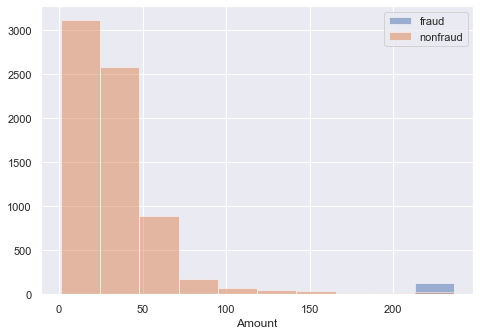

As the number fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, you
can see that the fraudulent transactions tend to be on the larger side relative to normal obervations. This is good news, 
as it helps us later in detecting fraud from non-fraud. In the next chapter you're going to implement a clustering model 
to distinguish between normal and abnormal transactions, when the fraud labels are no longer available.


In [46]:
# Using statistics to define normal behavior

# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.xlabel('Amount')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0)
plt.show()

print("""As the number fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, you
can see that the fraudulent transactions tend to be on the larger side relative to normal obervations. This is good news, 
as it helps us later in detecting fraud from non-fraud. In the next chapter you're going to implement a clustering model 
to distinguish between normal and abnormal transactions, when the fraud labels are no longer available.""")

#### Exercício 5 - Clustering methods to detect fraud

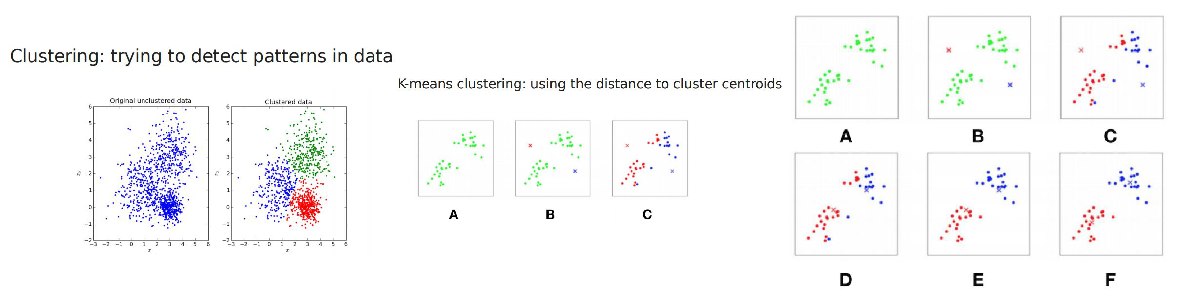

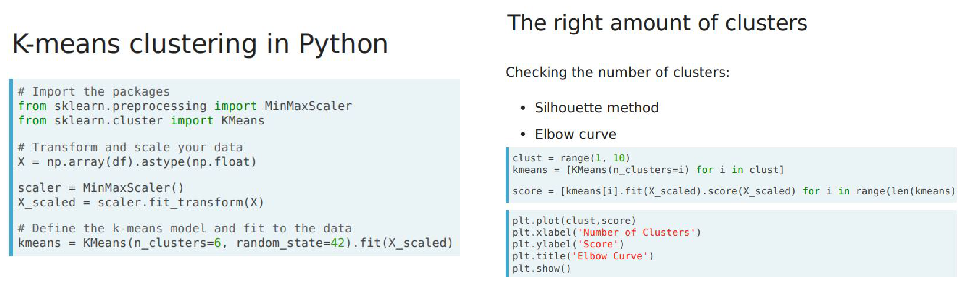

In [47]:
#vídeo
plot_3('clustering', 'k_means', 'k_means_2'); print("="*120); plot_2('k_means_python', 'define_k', wspace=0.1)

# it's important to scale the data
from sklearn.preprocessing import MinMaxScaler  # puts between 0 and 1
from sklearn.cluster import KMeans

Exercício 6

In [48]:
# create X and y --> transform the variables
X = df[df.age != 'U'].copy().drop('fraud', axis=1)
X['M'] = [1 if (i == 'M') else 0 for i in X['gender']] # 1 if Male, else 0
X = X.drop(['gender', 'age'], axis=1)
X = pd.get_dummies(X, prefix=None) # get dummies for categories
X['age'] = df['age'].copy() # add age

y = df[df.age != 'U']['fraud'].copy()

display(X.head())

amount  M  category_es_barsandrestaurants  category_es_contents  \
0   49.71  0                               0                     0   
1   39.29  0                               0                     0   
2   18.76  0                               0                     0   
3   13.95  1                               0                     0   
4   49.87  1                               0                     0   

   category_es_fashion  category_es_food  category_es_health  \
0                    0                 0                   0   
1                    0                 0                   1   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   category_es_home  category_es_hotelservices  category_es_hyper  \
0                 0                          0                  0   
1                 0                          0                  0   
2                 0                          0                  0   
3                 0                          0                  0   
4                 0                          0                  0   

   category_es_leisure  category_es_otherservices  category_es_sportsandtoys  \
0                    0                          0                          0   
1                    0                          0                          0   
2                    0                          0                          0   
3                    0                          0                          0   
4                    0                          0                          0   

   category_es_tech  category_es_transportation  category_es_travel  \
0                 0                           1                   0   
1                 0                           0                   0   
2                 0                           1                   0   
3                 0                           1                   0   
4                 0                           1                   0   

   category_es_wellnessandbeauty age  
0                              0   3  
1                              0   4  
2                              0   3  
3                              0   4  
4                              0   2

In [49]:
# Scaling the data

# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Take the float values of df for X
X = X.astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.20681002, 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.16247858, 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.07513457, 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.16666667],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.16666667],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667]])

Exercício 7

In [50]:
# K-means clustering

# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

Exercício 8

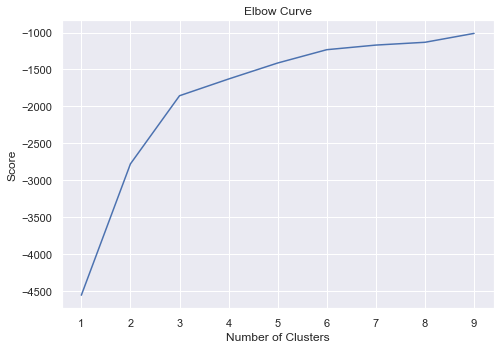

Now you can see that the optimal number of clusters should probably be at around 3 clusters, as that is where
the elbow is in the curve.


In [51]:
# Elbow method

# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0)
plt.show()

print("""Now you can see that the optimal number of clusters should probably be at around 3 clusters, as that is where
the elbow is in the curve.""")

#### Exercício 9 - Assigning fraud versus non-fraud

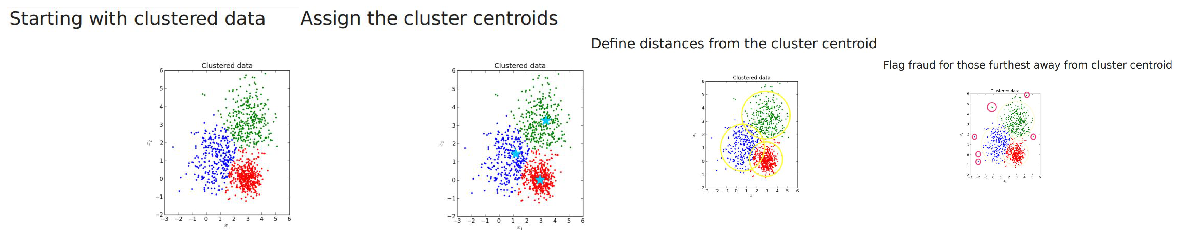

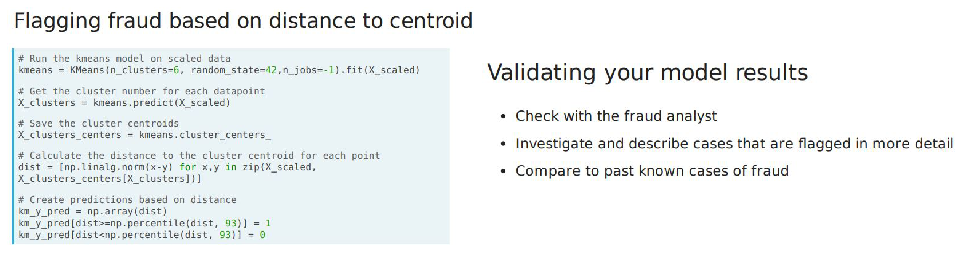

In [52]:
#vídeo
plot_4('clust_0', 'clust_1', 'clust_2', 'clust_3'); print("="*120); plot_2('flagging_fraud', 'validating')

Exercício 10

In [53]:
# Detecting outliers

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_

dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)

km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0
km_y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Exercício 11

ROC AUC score: 0.8463471932447306

Confusion matrix:


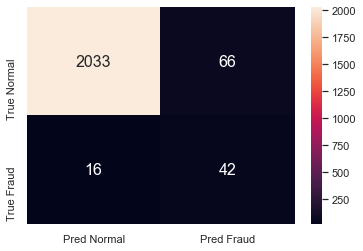

In [54]:
# Checking model results

# Obtain the ROC score
print("ROC AUC score:", roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
df_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'], ['Pred Normal','Pred Fraud'])

print("\nConfusion matrix:")
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
plt.show()

In [55]:
# Question
# If you were to decrease the percentile used as a cutoff point in the previous exercise to 93% instead of 95%, what would
# that do to your prediction results?

print("""The number of fraud cases caught increases, but false positives also increase.""")

# By lowering the threshold for cases flagged as fraud, you flag more cases overall but thereby also get more FPs.

The number of fraud cases caught increases, but false positives also increase.


#### Exercício 12 - Other clustering fraud detection methods

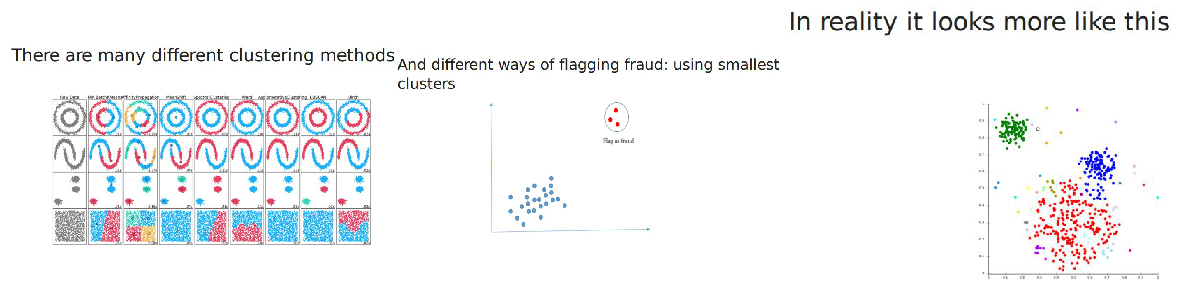

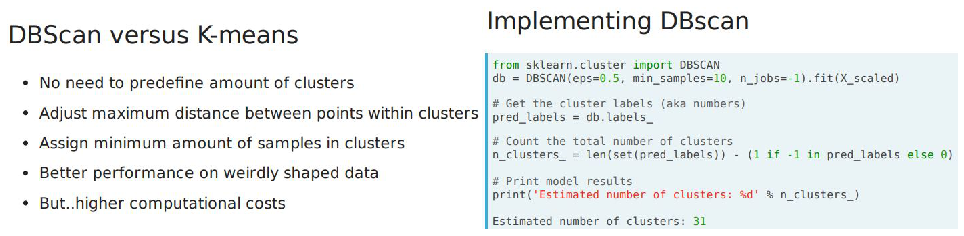

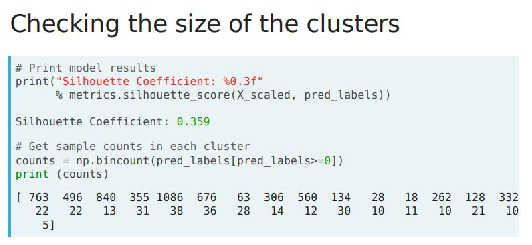

In [56]:
#vídeo
plot_3('many_clustering', 'diff', 'reality'); print("="*120); plot_2('dbscan_kmeans', 'dbscan'); 
plot_1('size_k', right=1.2)

from sklearn.cluster import DBSCAN

Exercício 13

In [57]:
# DB scan

# In this exercise you're going to explore using a density based clustering method (DBSCAN) to detect fraud. The advantage
# of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped 
# data (i.e. non-convex) much better than K-means can. This time, you are not going to take the outliers of the clusters 
# and use that for fraud, but take the smallest clusters in the data and label those as fraud. 

# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

labels = y.copy()

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

print("""\nThe number of clusters is much higher than with K-means. For fraud detection this is for now OK, as we are only
interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and 
decide which one to flag as fraud.""")

Estimated number of clusters: 23
Homogeneity: 0.612
Silhouette Coefficient: 0.715

The number of clusters is much higher than with K-means. For fraud detection this is for now OK, as we are only
interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and 
decide which one to flag as fraud.


Exercício 14

In [58]:
# Assessing smallest clusters

# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])
display(counts)

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]
print("The smallest clusters are clusters (index):", smallest_clusters)      

# Print the counts of the smallest clusters only
print("Their counts are:", counts[smallest_clusters])      

print("""\nSo now we know which smallest clusters you could flag as fraud. If you were to take more of the smallest
clusters, you cast your net wider and catch more fraud, but most likely also more false positives. It is up to the fraud 
analyst to find the right amount of cases to flag and to investigate. In the next exercise you'll check the results with
the actual labels.""")

array([3252,  145, 2714,   55,  174,  119,  122,   98,   54,   15,   76,
         15,   43,   25,   51,   47,   42,   15,   25,   20,   19,   10],
      dtype=int64)

The smallest clusters are clusters (index): [21 17  9]
Their counts are: [10 15 15]

So now we know which smallest clusters you could flag as fraud. If you were to take more of the smallest
clusters, you cast your net wider and catch more fraud, but most likely also more false positives. It is up to the fraud 
analyst to find the right amount of cases to flag and to investigate. In the next exercise you'll check the results with
the actual labels.


Exercício 15

In [59]:
# Checking results

# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud': labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21)|(df['clusternr']==17)|(df['clusternr']==9),1 , 0)

# Run a crosstab on the results 
display(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

print("""\nHow does this compare to the K-means model? The good thing is: our of all flagged cases, roughly 2/3 are 
actually fraud. Since you only take the three smallest clusters, by definition you flag less cases of fraud, so you catch 
less but also have less false positives. However, you are missing quite a lot of fraud cases. Increasing the amount of 
smallest clusters you flag could improve that, at the cost of more false positives of course.

In the next chapter you'll learn how to further improve fraud detection models by including text analysis.""")

Flagged Fraud     0   1
Actual Fraud           
0              6973  16
1               176  24


How does this compare to the K-means model? The good thing is: our of all flagged cases, roughly 2/3 are 
actually fraud. Since you only take the three smallest clusters, by definition you flag less cases of fraud, so you catch 
less but also have less false positives. However, you are missing quite a lot of fraud cases. Increasing the amount of 
smallest clusters you flag could improve that, at the cost of more false positives of course.

In the next chapter you'll learn how to further improve fraud detection models by including text analysis.


# CHAPTER 4 - Fraud detection using text


Text data, text mining and topic modeling to detect fraudulent behavior.

#### Exercício 1 - Using text data

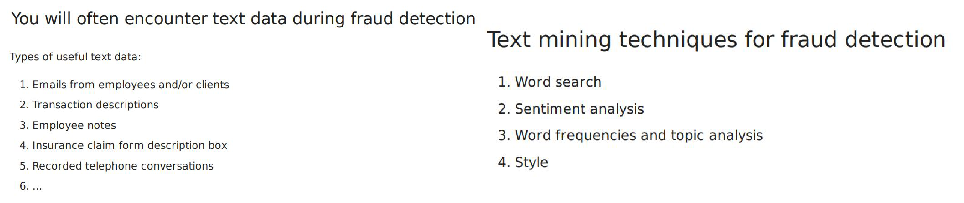

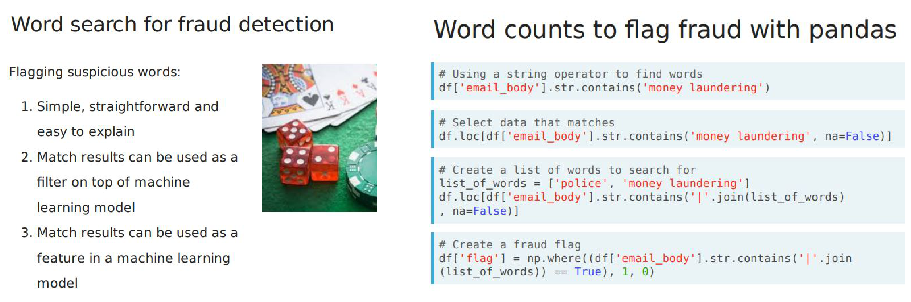

In [60]:
#vídeo
plot_2('text', 'text_mining'); print("="*120); plot_2('word_search', 'word_counts')

Exercício 2

In [61]:
# Word search with dataframes

df = pd.read_csv(data_folder + "enron_emails_clean.csv")

# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)

# Select the data from df using the mask
display(df.loc[mask])

Message-ID                        From  \
154  <6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')   

                             To                 Date  \
154  ('sarah.palmer@enron.com')  2002-02-01 14:53:35   

                                               content  \
154  \nJoint Venture: A 1997 Enron Meeting Belies O...   

                                         clean_content  
154  joint venture enron meeting belies officers cl...

Exercício 3

In [62]:
# Using list of terms

# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df ---> | serves as 'or'
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]

display(filtered_emails)

Message-ID  \
0      <8345058.1075840404046.JavaMail.evans@thyme>   
1      <1512159.1075863666797.JavaMail.evans@thyme>   
2     <26118676.1075862176383.JavaMail.evans@thyme>   
3     <10369289.1075860831062.JavaMail.evans@thyme>   
4     <26728895.1075860815046.JavaMail.evans@thyme>   
...                                             ...   
1151  <15875618.1075860830584.JavaMail.evans@thyme>   
1450  <30798399.1075841348382.JavaMail.evans@thyme>   
1473    <957052.1075861359136.JavaMail.evans@thyme>   
1557  <18936682.1075861158419.JavaMail.evans@thyme>   
1621   <5472336.1075841501893.JavaMail.evans@thyme>   

                                   From                                 To  \
0       ('advdfeedback@investools.com')    ('advdfeedback@investools.com')   
1         ('richard.sanders@enron.com')      ('richard.sanders@enron.com')   
2                 ('m..love@enron.com')              ('m..love@enron.com')   
3          ('leslie.milosevich@kp.org')       ('leslie.milosevich@kp.org')   
4          ('rtwait@graphicaljazz.com')       ('rtwait@graphicaljazz.com')   
...                                 ...                                ...   
1151             ('bandersn@loyno.edu')             ('bandersn@loyno.edu')   
1450       ('chairman.enron@enron.com')       ('chairman.enron@enron.com')   
1473         ('chairman.ken@enron.com')         ('chairman.ken@enron.com')   
1557      ('resources.human@enron.com')      ('resources.human@enron.com')   
1621  ('announcements.enron@enron.com')  ('announcements.enron@enron.com')   

                     Date                                            content  \
0     2002-01-29 23:20:55  INVESTools Advisory\nA Free Digest of Trusted ...   
1     2000-09-20 19:07:00  ----- Forwarded by Richard B Sanders/HOU/ECT o...   
2     2001-10-30 16:15:17  hey you are not wearing your target purple shi...   
3     2002-01-30 17:54:18  Leslie Milosevich\n1042 Santa Clara Avenue\nAl...   
4     2002-01-30 19:36:01  Rini Twait\n1010 E 5th Ave\nLongmont, CO 80501...   
...                   ...                                                ...   
1151  2002-01-30 17:54:12  Blanca Anderson\n1310 Cadiz\nNew orleans, LA 7...   
1450  2002-01-16 14:45:55  \nEnron announced today that its common stock ...   
1473  2001-11-09 23:48:54  \nToday, we announced plans to merge with Dyne...   
1557  2001-11-25 23:15:46  We've updated the Merger Q&A document on our E...   
1621  2002-01-23 20:51:34  \nPLEASE READ THIS IMPORTANT INFORMATION CONCE...   

                                          clean_content  
0     investools advisory free digest trusted invest...  
1     forwarded richard b sanders hou ect pm justin ...  
2     hey wearing target purple shirt today mine wan...  
3     leslie milosevich santa clara avenue alameda c...  
4     rini twait e th ave longmont co rtwait graphic...  
...                                                 ...  
1151  blanca anderson cadiz new orleans la bandersn ...  
1450  enron announced today common stock traded coun...  
1473  today announced plans merge dynegy major playe...  
1557  updated merger q document enron updates site h...  
1621  please read important information concerning e...  

[314 rows x 6 columns]

Exercício 4

In [63]:
# Creating a flag

# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

0    1776
1     314
Name: flag, dtype: int64


#### Exercício 5 - Text mining to detect fraud

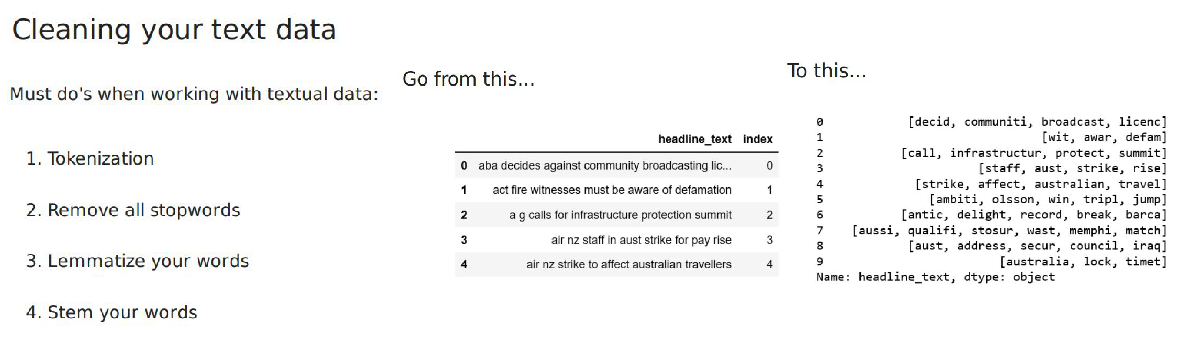

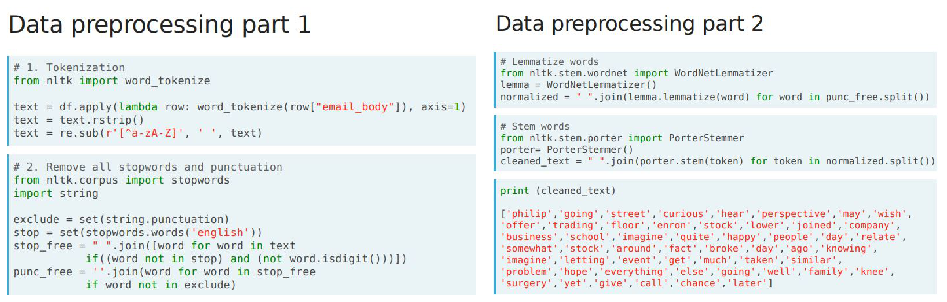

In [64]:
#vídeo
plot_3('cleaning', 'go1', 'go2'); print("="*120); plot_2('preprocess1', 'preprocess2')

from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

Exercício 6

In [65]:
# Removing stopwords

# Import nltk packages and string 
from nltk.corpus import stopwords
import string

# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))
print(stop, "\n")

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)
print(exclude)

{'once', 'its', 'you', 'who', 'for', 'which', "she's", 'because', 'to', 'she', 'why', 'those', 'in', 'yourselves', 'herself', "you've", "don't", 'should', 'themselves', 'haven', 'against', 'were', 'down', 'himself', 'ain', 'll', 'from', 'these', 'now', 'is', 'd', 'am', "shouldn't", 'cc', 'yours', "it's", 'how', 'more', 'm', 'sent', 'hasn', 'yourself', 'few', 't', 'then', 'wouldn', 'didn', 'into', "didn't", 'do', 'ma', 'ourselves', 'them', "aren't", "mustn't", 'very', "that'll", 'will', 'after', 'above', 'itself', 'they', 'such', 'during', "weren't", 'wasn', 'each', 'u', 'under', 'an', 'at', 'isn', 'here', 'ect', 'while', 'being', 'be', 'aren', 'most', 'further', 'same', 'doing', 'up', 'y', 'doesn', 'a', 'both', "hasn't", 'did', 'does', 've', 'don', 'fwd', 'has', 'are', 'too', 'between', 'there', 'couldn', "mightn't", 'have', 'no', "isn't", 'with', 'subject', 'this', 'ours', 'all', 'so', 'that', 'weren', 'he', "you'd", 'him', 'when', 'com', 'shouldn', 'had', 'just', 'than', 'where', "sh

Exercício 7

In [67]:
%%script false
# Cleaning text data

# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    # Remove stopwords
    stop_free = " ".join([word for word in text.lower().split() if ((word not in stop) and (not word.isdigit()))])
    # Remove punctuations
    punc_free = ''.join(word for word in stop_free if word not in exclude)
    # Lemmatize all words
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())      
    return normalized

# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    

print(text_clean)

Couldn't find program: 'false'


#### Exercício 8 - Topic modeling on fraud

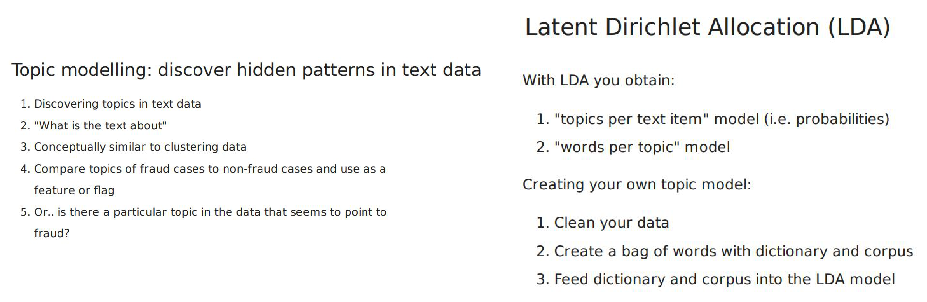

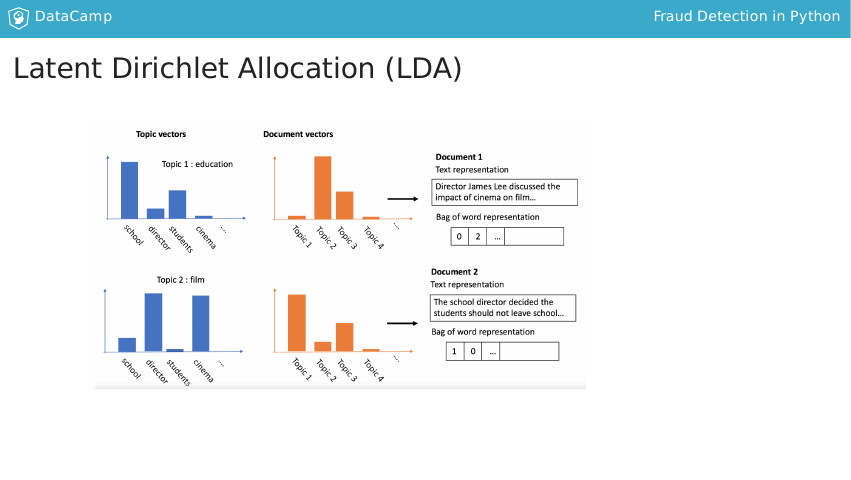

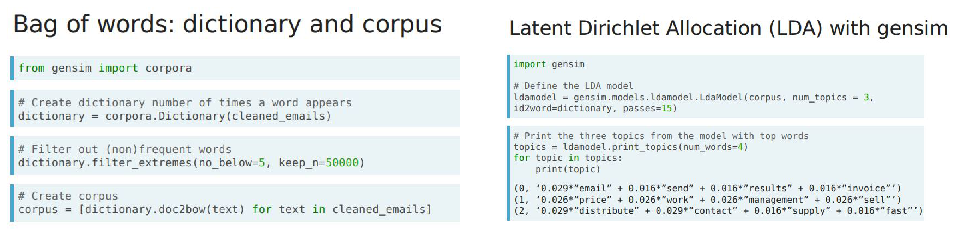

In [68]:
#vídeo
plot_2('topic', 'lda'); display(pdf_4[16]); plot_2('bow', 'lda_gensim', wspace=0.1)

from gensim import corpora

Exercício 9

In [70]:
%%script false
# Create dictionary and corpus

# Import the packages
import gensim
from gensim import corpora

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in text_clean]

# Print corpus and dictionary
print(dictionary, "\n")
print(corpus)

Couldn't find program: 'false'


Exercício 10

In [71]:
# LDA model

# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)


(0, '0.047*"enron" + 0.029*"employee" + 0.025*"company" + 0.024*"million" + 0.017*"made"')
(1, '0.022*"enron" + 0.012*"company" + 0.007*"energy" + 0.006*"said" + 0.005*"new"')
(2, '0.023*"enron" + 0.011*"company" + 0.010*"said" + 0.007*"mr" + 0.005*"stock"')
(3, '0.017*"enron" + 0.012*"company" + 0.006*"energy" + 0.006*"said" + 0.005*"stock"')
(4, '0.043*"enron" + 0.019*"stock" + 0.013*"option" + 0.010*"dynegy" + 0.009*"company"')


#### Exercício 11 - Flagging fraud based on topics

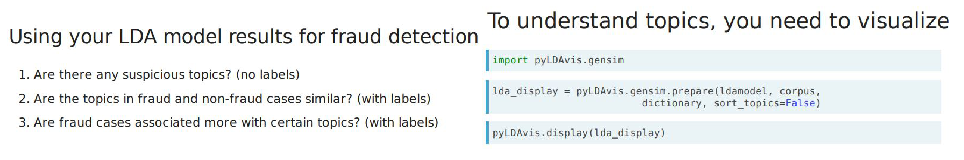

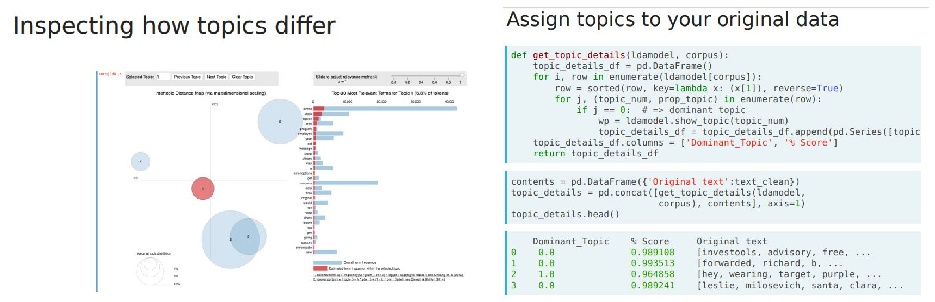

In [72]:
#vídeo

import pyLDAvis.gensim

plot_2('lda_fraud', 'pyldavis'); plot_2('inspecting_topics', 'assign_topics')

Exercício 12

In [73]:
# Interpreting the topic model
# Below are visualisation results from the pyLDAvis library available. Have a look at topic 1 and 3 from the LDA model
# on the Enron email data. Which one would you research further for fraud detection purposes and why?
print("Topic 1")

Topic 1


Exercício 13

In [74]:
# Finding fraudsters based on topic

def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic_details_df = topic_details_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]),
                                                           ignore_index=True)
    topic_details_df.columns = ['Dominant_Topic', '% Score', 'Topic_Keywords']
    return topic_details_df


In [75]:
# 1) 
# Run get_topic_details function and check the results
display(get_topic_details(ldamodel, corpus))

Dominant_Topic  % Score  \
0               2.0   0.9992   
1               2.0   0.9613   
2               2.0   0.5934   
3               0.0   0.9935   
4               0.0   0.9934   
..              ...      ...   
349             2.0   0.6950   
350             4.0   0.9533   
351             1.0   0.7792   
352             4.0   0.9746   
353             2.0   0.9187   

                                        Topic_Keywords  
0    enron, company, said, mr, stock, time, e, new,...  
1    enron, company, said, mr, stock, time, e, new,...  
2    enron, company, said, mr, stock, time, e, new,...  
3    enron, employee, company, million, made, fund,...  
4    enron, employee, company, million, made, fund,...  
..                                                 ...  
349  enron, company, said, mr, stock, time, e, new,...  
350  enron, stock, option, dynegy, company, employe...  
351  enron, company, energy, said, new, e, stock, y...  
352  enron, stock, option, dynegy, company, employe...  
353  enron, company, said, mr, stock, time, e, new,...  

[354 rows x 3 columns]

In [76]:
# 2)
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)

display(topic_details.head())

Dominant_Topic  % Score                                     Topic_Keywords  \
0             2.0   0.9992  enron, company, said, mr, stock, time, e, new,...   
1             2.0   0.9613  enron, company, said, mr, stock, time, e, new,...   
2             2.0   0.5934  enron, company, said, mr, stock, time, e, new,...   
3             0.0   0.9935  enron, employee, company, million, made, fund,...   
4             0.0   0.9934  enron, employee, company, million, made, fund,...   

                                       Original text  
0  [investools, advisory, free, digest, trusted, ...  
1  [forwarded, richard, b, sander, hou, pm, justi...  
2  [hey, wearing, target, purple, shirt, today, m...  
3  [leslie, milosevich, santa, clara, avenue, ala...  
4  [rini, twait, e, th, ave, longmont, co, rtwait...

In [77]:
# 3)
# Create flag for text highest associated with topic 3
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)

display(topic_details.head())

Dominant_Topic  % Score                                     Topic_Keywords  \
0             2.0   0.9992  enron, company, said, mr, stock, time, e, new,...   
1             2.0   0.9613  enron, company, said, mr, stock, time, e, new,...   
2             2.0   0.5934  enron, company, said, mr, stock, time, e, new,...   
3             0.0   0.9935  enron, employee, company, million, made, fund,...   
4             0.0   0.9934  enron, employee, company, million, made, fund,...   

                                       Original text  flag  
0  [investools, advisory, free, digest, trusted, ...     0  
1  [forwarded, richard, b, sander, hou, pm, justi...     0  
2  [hey, wearing, target, purple, shirt, today, m...     0  
3  [leslie, milosevich, santa, clara, avenue, ala...     0  
4  [rini, twait, e, th, ave, longmont, co, rtwait...     0

#### Exercício 14 - end

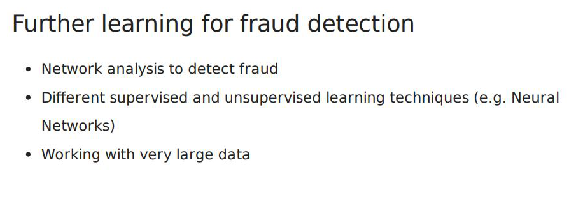

In [80]:
#vídeo
plot_1('further_learning', right=1.3)

# Fim